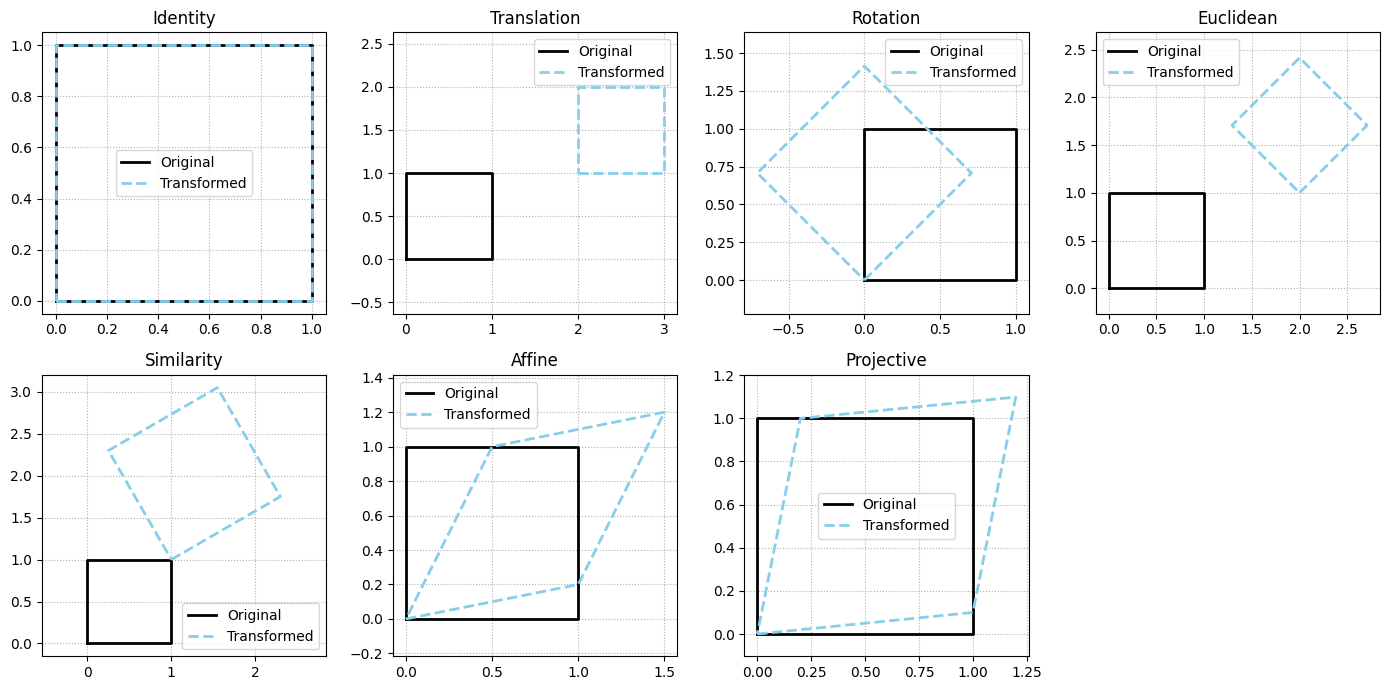

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def apply_transform(points, matrix):
    homog_points = np.hstack([points, np.ones((points.shape[0], 1))])
    transformed = homog_points @ matrix.T
    transformed /= transformed[:, [2]]  # Normalize homogeneous coordinates
    return transformed[:, :2]

def close_polygon(points):
    """Ensure polygon is closed for plotting."""
    return np.vstack([points, points[0]])

# ----------------------------
# Transformation Matrices
# ----------------------------
def translation_matrix(tx, ty):
    return np.array([[1, 0, tx],
                     [0, 1, ty],
                     [0, 0, 1]])

def rotation_matrix(theta_deg):
    theta = np.deg2rad(theta_deg)
    return np.array([[np.cos(theta), -np.sin(theta), 0],
                     [np.sin(theta),  np.cos(theta), 0],
                     [0, 0, 1]])

def euclidean_matrix(theta_deg, tx, ty):
    return translation_matrix(tx, ty) @ rotation_matrix(theta_deg)

def similarity_matrix(theta_deg, k, tx, ty):
    theta = np.deg2rad(theta_deg)
    return np.array([[k*np.cos(theta), -k*np.sin(theta), tx],
                     [k*np.sin(theta),  k*np.cos(theta), ty],
                     [0, 0, 1]])

def affine_matrix(a11, a12, a21, a22, a13, a23):
    return np.array([[a11, a12, a13],
                     [a21, a22, a23],
                     [0,   0,   1]])

def projective_matrix(h11,h12,h13,h21,h22,h23,h31,h32,h33):
    return np.array([[h11,h12,h13],
                     [h21,h22,h23],
                     [h31,h32,h33]])

# ----------------------------
# Example Usage + Visualization
# ----------------------------
# Original square points
points = np.array([[0,0], [1,0], [1,1], [0,1]])

# Define transformations
transformations = {
    "Identity": np.eye(3),
    "Translation": translation_matrix(2, 1),
    "Rotation": rotation_matrix(45),
    "Euclidean": euclidean_matrix(45, 2, 1),
    "Similarity": similarity_matrix(30, 1.5, 1, 1),
    "Affine": affine_matrix(1, 0.5, 0.2, 1, 0, 0),
    "Projective": projective_matrix(1,0.2,0, 0.1,1,0, 0.001,0.001,1)
}

# Plot
fig, axes = plt.subplots(2, 4, figsize=(14, 7))
axes = axes.ravel()

for i, (name, mat) in enumerate(transformations.items()):
    transformed = apply_transform(points, mat)

    axes[i].plot(*close_polygon(points).T, color="black", linewidth=2, label="Original")
    axes[i].plot(*close_polygon(transformed).T, color="skyblue", linestyle="--", linewidth=2, label="Transformed")

    axes[i].set_title(name)
    axes[i].axis("equal")
    axes[i].grid(True, linestyle=":")
    axes[i].legend()

# Hide extra subplot if uneven
for j in range(len(transformations), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()



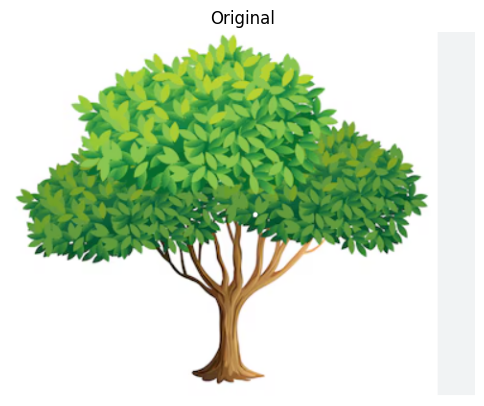

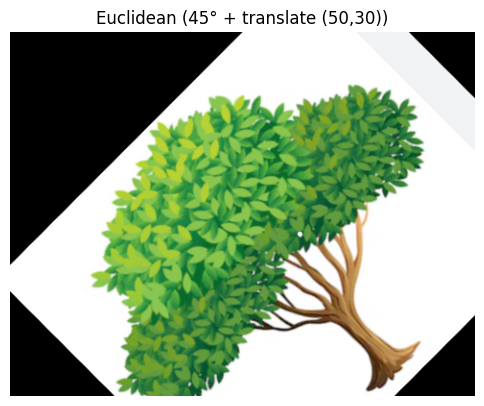

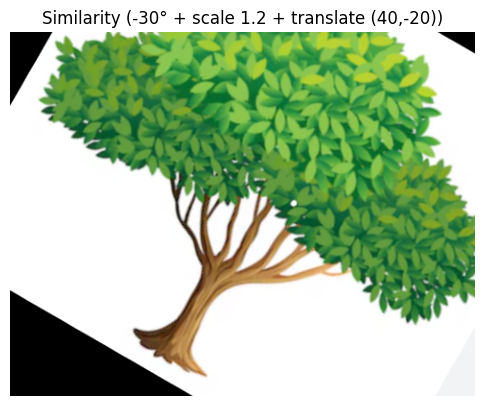

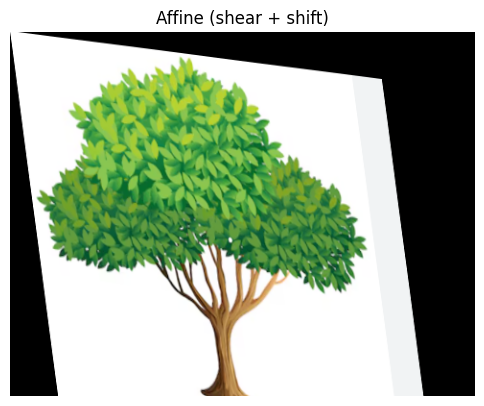

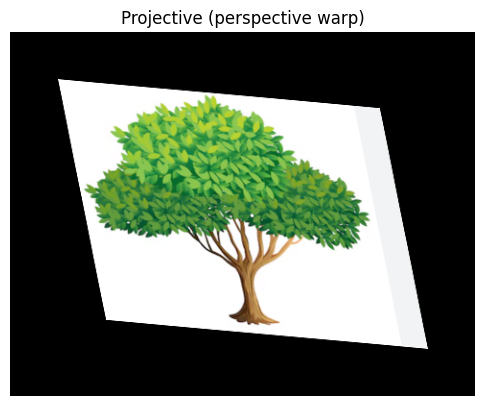

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(title, img):
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

# Load an image
img = cv2.imread("/content/Screenshot 2025-08-29 220853.png")
h, w = img.shape[:2]
center = (w//2, h//2)

# 1. Euclidean Transformation (rotation + translation)
# Rotate by 45 degrees, translate by (50, 30)
R = cv2.getRotationMatrix2D(center, 45, 1.0)   # scale = 1
R[:,2] += [50, 30]   # translation
euclid_img = cv2.warpAffine(img, R, (w,h))

# 2. Similarity Transformation (rotation + scaling + translation)
# Rotate by -30 degrees, scale = 1.2, translate by (40, -20)
M = cv2.getRotationMatrix2D(center, -30, 1.2)
M[:,2] += [40, -20]
similarity_img = cv2.warpAffine(img, M, (w,h))

# 3. Affine Transformation
# Map 3 source points to 3 destination points
pts1 = np.float32([[0,0], [w-1,0], [0,h-1]])
pts2 = np.float32([[0,0], [int(0.8*(w-1)), 50], [50, h-1]])
A = cv2.getAffineTransform(pts1, pts2)
affine_img = cv2.warpAffine(img, A, (w,h))

# 4. Projective Transformation (Homography)
# Map 4 corners of image to a new quadrilateral
pts1 = np.float32([[0,0], [w-1,0], [0,h-1], [w-1,h-1]])
pts2 = np.float32([[50,50], [w-100, 80], [100,h-80], [w-50,h-50]])
H = cv2.getPerspectiveTransform(pts1, pts2)
proj_img = cv2.warpPerspective(img, H, (w,h))

# Show results
show("Original", img)
show("Euclidean (45° + translate (50,30))", euclid_img)
show("Similarity (-30° + scale 1.2 + translate (40,-20))", similarity_img)
show("Affine (shear + shift)", affine_img)
show("Projective (perspective warp)", proj_img)
